# Formatos de Archivos y Representación del Conocimiento en Ciencia de Datos

**Maestría en Ciencia de Datos e Inteligencia Artificial**

---

## Objetivos de Aprendizaje

En este notebook exploraremos:

1. **XML (eXtensible Markup Language)**: Representación jerárquica y estructurada de datos
2. **CSV (Comma-Separated Values)**: Formato tabular universal para datos estructurados
3. **JSON (JavaScript Object Notation)**: Representación ligera y flexible de datos
4. **Formatos de Compresión**: TAR, GZIP y ZIP para almacenamiento eficiente
5. **Formatos Contenedores**: Procesamiento de video e imagen

## ¿Por qué son importantes los formatos de archivo en Ciencia de Datos?

- **Intercambio de datos** entre sistemas y equipos
- **Almacenamiento eficiente** de grandes volúmenes de datos
- **Representación del conocimiento** en diferentes contextos
- **Optimización** de pipelines de ML y procesamiento
- **Interoperabilidad** entre plataformas y lenguajes

---

## 1. Importar Bibliotecas Necesarias

Comenzamos importando todas las bibliotecas que utilizaremos en este notebook.

In [2]:
# Procesamiento de datos
import pandas as pd
import numpy as np

# Manipulación de archivos XML y JSON
import xml.etree.ElementTree as ET
from xml.dom import minidom
import json

# Compresión
import tarfile
import gzip
import zipfile

# Procesamiento de imágenes
from PIL import Image
from PIL.ExifTags import TAGS

# Utilidades
import os
from pathlib import Path
from typing import Dict, List, Any
import warnings
warnings.filterwarnings('ignore')

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Todas las bibliotecas importadas correctamente")

Matplotlib is building the font cache; this may take a moment.


✓ Todas las bibliotecas importadas correctamente


## 2. Trabajar con Archivos XML

XML (eXtensible Markup Language) es un formato de marcado que define reglas para codificar documentos de manera legible tanto para humanos como para máquinas.

### Características principales:
- **Jerárquico**: Estructura de árbol con elementos anidados
- **Auto-descriptivo**: Los tags describen el contenido
- **Extensible**: Se pueden definir tags personalizados
- **Validable**: Soporta schemas (XSD, DTD)

### Casos de uso en Ciencia de Datos:
- Configuración de modelos y pipelines
- Representación de ontologías y grafos de conocimiento
- Intercambio de datos estructurados entre sistemas
- Almacenamiento de metadata de experimentos

In [10]:
# Crear un archivo XML con metadatos de experimentos ML
experimentos_xml = """<?xml version="1.0" encoding="UTF-8"?>
<experimentos>
    <metadata>
        <proyecto>Clasificación de Imágenes</proyecto>
        <investigador>Dr. María González</investigador>
        <fecha>2025-11-19</fecha>
    </metadata>
    <experimento id="001">
        <modelo>
            <nombre>ResNet50</nombre>
            <arquitectura>CNN</arquitectura>
            <parametros>25000000</parametros>
        </modelo>
        <dataset>
            <nombre>CIFAR-10</nombre>
            <train_samples>50000</train_samples>
            <test_samples>10000</test_samples>
        </dataset>
        <resultados>
            <accuracy>0.9234</accuracy>
            <precision>0.9187</precision>
            <recall>0.9256</recall>
            <f1_score>0.9221</f1_score>
        </resultados>
        <hiperparametros>
            <batch_size>32</batch_size>
            <learning_rate>0.001</learning_rate>
            <epochs>50</epochs>
        </hiperparametros>
    </experimento>
    <experimento id="002">
        <modelo>
            <nombre>VGG16</nombre>
            <arquitectura>CNN</arquitectura>
            <parametros>138000000</parametros>
        </modelo>
        <dataset>
            <nombre>CIFAR-10</nombre>
            <train_samples>50000</train_samples>
            <test_samples>10000</test_samples>
        </dataset>
        <resultados>
            <accuracy>0.9089</accuracy>
            <precision>0.9034</precision>
            <recall>0.9123</recall>
            <f1_score>0.9078</f1_score>
        </resultados>
        <hiperparametros>
            <batch_size>32</batch_size>
            <learning_rate>0.0001</learning_rate>
            <epochs>50</epochs>
        </hiperparametros>
    </experimento>
</experimentos>
"""

# Guardar XML
with open('experimentos.xml', 'w', encoding='utf-8') as f:
    f.write(experimentos_xml)

print("✓ Archivo XML creado: experimentos.xml")

✓ Archivo XML creado: experimentos.xml


In [11]:
# Parsear XML y extraer datos
tree = ET.parse('experimentos.xml')
root = tree.getroot()

print("Análisis del archivo XML\n")
print(f"Elemento raíz: {root.tag}")
print(f"Metadatos del proyecto:")
metadata = root.find('metadata')
for child in metadata:
    print(f"  • {child.tag}: {child.text}")

print(f"\nExperimentos encontrados: {len(root.findall('experimento'))}\n")

# Extraer datos de experimentos
experimentos_data = []
for exp in root.findall('experimento'):
    exp_id = exp.get('id')
    modelo = exp.find('modelo/nombre').text
    accuracy = float(exp.find('resultados/accuracy').text)
    f1_score = float(exp.find('resultados/f1_score').text)
    parametros = int(exp.find('modelo/parametros').text)
    
    experimentos_data.append({
        'ID': exp_id,
        'Modelo': modelo,
        'Accuracy': accuracy,
        'F1-Score': f1_score,
        'Parámetros': parametros
    })
    
    print(f"Experimento {exp_id}:")
    print(f"  Modelo: {modelo}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1-Score: {f1_score:.4f}")
    print(f"  Parámetros: {parametros:,}")
    print()

Análisis del archivo XML

Elemento raíz: experimentos
Metadatos del proyecto:
  • proyecto: Clasificación de Imágenes
  • investigador: Dr. María González
  • fecha: 2025-11-19

Experimentos encontrados: 2

Experimento 001:
  Modelo: ResNet50
  Accuracy: 0.9234
  F1-Score: 0.9221
  Parámetros: 25,000,000

Experimento 002:
  Modelo: VGG16
  Accuracy: 0.9089
  F1-Score: 0.9078
  Parámetros: 138,000,000



📈 DataFrame creado desde XML:

 ID   Modelo  Accuracy  F1-Score  Parámetros
001 ResNet50    0.9234    0.9221    25000000
002    VGG16    0.9089    0.9078   138000000


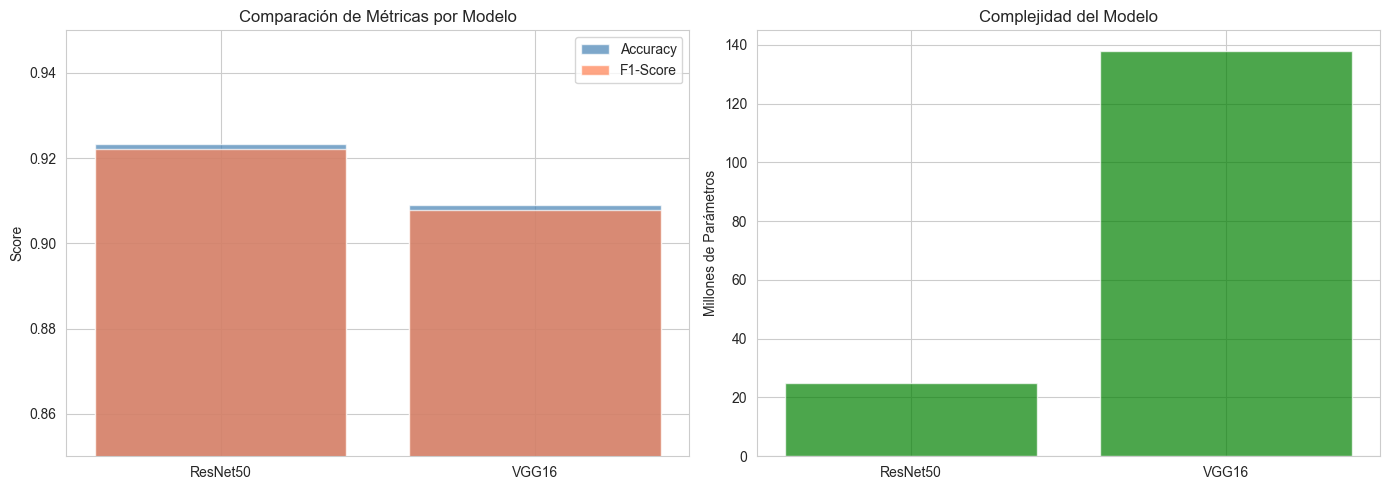


💡 Observación: ResNet50 tiene mejor accuracy con menos parámetros que VGG16


In [ ]:
# Convertir XML a DataFrame de pandas
df_experimentos = pd.DataFrame(experimentos_data)
print("DataFrame creado desde XML:\n")
print(df_experimentos.to_string(index=False))

# Visualizar comparación de modelos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Accuracy vs F1-Score
axes[0].bar(df_experimentos['Modelo'], df_experimentos['Accuracy'], 
            alpha=0.7, label='Accuracy', color='steelblue')
axes[0].bar(df_experimentos['Modelo'], df_experimentos['F1-Score'], 
            alpha=0.7, label='F1-Score', color='coral')
axes[0].set_ylabel('Score')
axes[0].set_title('Comparación de Métricas por Modelo')
axes[0].legend()
axes[0].set_ylim([0.85, 0.95])

# Gráfico 2: Número de parámetros
axes[1].bar(df_experimentos['Modelo'], df_experimentos['Parámetros'] / 1e6, 
            color='green', alpha=0.7)
axes[1].set_ylabel('Millones de Parámetros')
axes[1].set_title('Complejidad del Modelo')

plt.tight_layout()
plt.show()

print("Observación: ResNet50 tiene mejor accuracy con menos parámetros que VGG16")

## 3. Procesamiento de Archivos CSV

CSV (Comma-Separated Values) es el formato más común para datos tabulares.

### Ventajas:
- ✓ Universal y ampliamente soportado
- ✓ Legible por humanos
- ✓ Simple de crear y procesar
- ✓ Compatible con Excel, R, Python, SQL, etc.

### Desventajas:
- ✗ No preserva tipos de datos
- ✗ Problemas con delimitadores en el texto
- ✗ No soporta datos jerárquicos
- ✗ Archivos grandes pueden ser ineficientes

### Casos de uso:
- Exportación de bases de datos
- Datasets de Machine Learning
- Reportes y análisis de datos
- Intercambio de datos entre plataformas

In [12]:
# Crear dataset de ejemplo: Resultados de modelos de NLP
datos_nlp = {
    'modelo': ['BERT-base', 'RoBERTa-base', 'GPT-2', 'DistilBERT', 'ELECTRA', 'ALBERT'],
    'parametros_millones': [110, 125, 117, 66, 110, 12],
    'accuracy': [0.8934, 0.9123, 0.8756, 0.8678, 0.8989, 0.8845],
    'f1_score': [0.8912, 0.9098, 0.8734, 0.8656, 0.8967, 0.8823],
    'velocidad_inferencia_ms': [23.4, 25.8, 31.2, 15.6, 24.1, 12.3],
    'dataset': ['SST-2', 'SST-2', 'SST-2', 'SST-2', 'SST-2', 'SST-2'],
    'año': [2018, 2019, 2019, 2019, 2020, 2019]
}

df_nlp = pd.DataFrame(datos_nlp)

# Guardar en CSV
df_nlp.to_csv('modelos_nlp.csv', index=False)
print("Archivo CSV creado: modelos_nlp.csv\n")

# Mostrar datos
print("Dataset de Modelos NLP:")
print(df_nlp.to_string(index=False))

Archivo CSV creado: modelos_nlp.csv

Dataset de Modelos NLP:
      modelo  parametros_millones  accuracy  f1_score  velocidad_inferencia_ms dataset  año
   BERT-base                  110    0.8934    0.8912                     23.4   SST-2 2018
RoBERTa-base                  125    0.9123    0.9098                     25.8   SST-2 2019
       GPT-2                  117    0.8756    0.8734                     31.2   SST-2 2019
  DistilBERT                   66    0.8678    0.8656                     15.6   SST-2 2019
     ELECTRA                  110    0.8989    0.8967                     24.1   SST-2 2020
      ALBERT                   12    0.8845    0.8823                     12.3   SST-2 2019


ANÁLISIS EXPLORATORIO

1. Estadísticas descriptivas:
       parametros_millones  accuracy  f1_score  velocidad_inferencia_ms
count             6.000000  6.000000  6.000000                 6.000000
mean             90.000000  0.888750  0.886500                22.066667
std              43.391243  0.016181  0.016094                 6.935032
min              12.000000  0.867800  0.865600                12.300000
25%              77.000000  0.877825  0.875625                17.550000
50%             110.000000  0.888950  0.886750                23.750000
75%             115.250000  0.897525  0.895325                25.375000
max             125.000000  0.912300  0.909800                31.200000

2. Correlaciones:
                         parametros_millones  accuracy  \
parametros_millones                 1.000000  0.455622   
accuracy                            0.455622  1.000000   
velocidad_inferencia_ms             0.904959  0.305909   

                         velocidad_inferencia_m

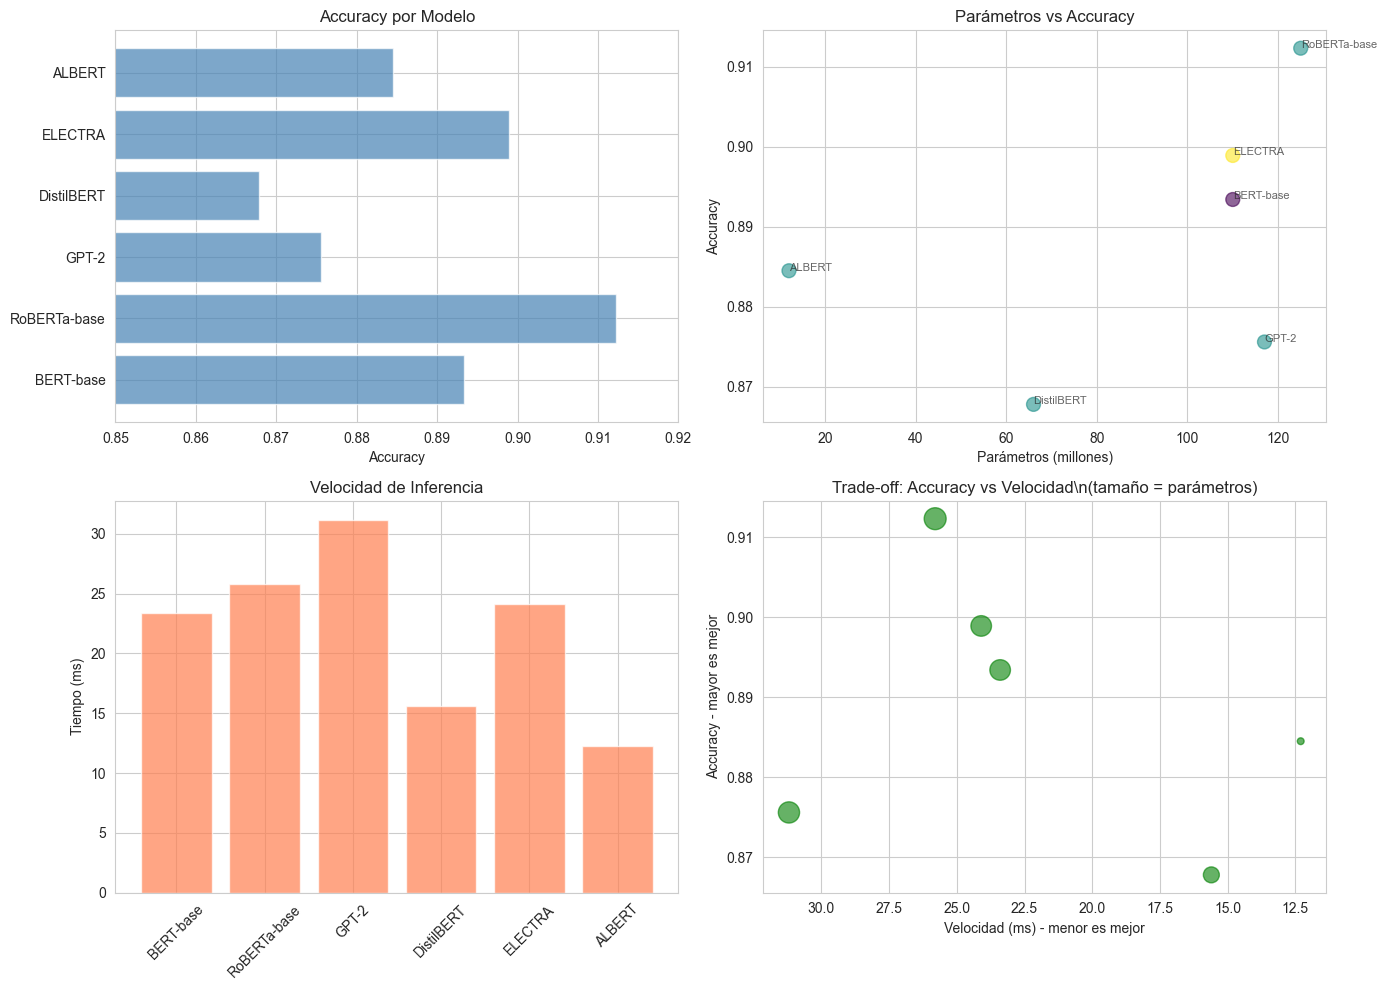

Insights:
  • RoBERTa-base tiene la mejor accuracy (0.9123)
  • ALBERT es el más rápido (12.3ms) con menor número de parámetros
  • DistilBERT ofrece buen balance: accuracy decente y muy rápido


In [13]:
# Análisis Exploratorio de Datos
print("ANÁLISIS EXPLORATORIO\n")

print("1. Estadísticas descriptivas:")
print(df_nlp[['parametros_millones', 'accuracy', 'f1_score', 'velocidad_inferencia_ms']].describe())

print("\n2. Correlaciones:")
correlaciones = df_nlp[['parametros_millones', 'accuracy', 'velocidad_inferencia_ms']].corr()
print(correlaciones)

# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Accuracy por modelo
axes[0, 0].barh(df_nlp['modelo'], df_nlp['accuracy'], color='steelblue', alpha=0.7)
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_title('Accuracy por Modelo')
axes[0, 0].set_xlim([0.85, 0.92])

# 2. Parámetros vs Accuracy
axes[0, 1].scatter(df_nlp['parametros_millones'], df_nlp['accuracy'], 
                   s=100, alpha=0.6, c=df_nlp['año'], cmap='viridis')
axes[0, 1].set_xlabel('Parámetros (millones)')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_title('Parámetros vs Accuracy')
for i, modelo in enumerate(df_nlp['modelo']):
    axes[0, 1].annotate(modelo, 
                        (df_nlp['parametros_millones'].iloc[i], df_nlp['accuracy'].iloc[i]),
                        fontsize=8, alpha=0.7)

# 3. Velocidad de inferencia
axes[1, 0].bar(df_nlp['modelo'], df_nlp['velocidad_inferencia_ms'], 
               color='coral', alpha=0.7)
axes[1, 0].set_ylabel('Tiempo (ms)')
axes[1, 0].set_title('Velocidad de Inferencia')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Trade-off: Accuracy vs Velocidad
axes[1, 1].scatter(df_nlp['velocidad_inferencia_ms'], df_nlp['accuracy'], 
                   s=df_nlp['parametros_millones']*2, alpha=0.6, c='green')
axes[1, 1].set_xlabel('Velocidad (ms) - menor es mejor')
axes[1, 1].set_ylabel('Accuracy - mayor es mejor')
axes[1, 1].set_title('Trade-off: Accuracy vs Velocidad\\n(tamaño = parámetros)')
axes[1, 1].invert_xaxis()

plt.tight_layout()
plt.show()

print("Insights:")
print("  • RoBERTa-base tiene la mejor accuracy (0.9123)")
print("  • ALBERT es el más rápido (12.3ms) con menor número de parámetros")
print("  • DistilBERT ofrece buen balance: accuracy decente y muy rápido")

In [14]:
# Ejemplo: CSV con delimitadores diferentes
print("MANEJO DE DELIMITADORES PERSONALIZADOS\n")

# CSV con punto y coma (común en Europa)
csv_semicolon = """nombre;edad;ciudad;salario
Juan Pérez;28;Madrid;45000
María García;34;Barcelona;52000
Carlos López;45;Valencia;38000"""

with open('empleados_semicolon.csv', 'w', encoding='utf-8') as f:
    f.write(csv_semicolon)

# Leer con delimitador personalizado
df_empleados = pd.read_csv('empleados_semicolon.csv', sep=';')
print("✓ CSV con separador ';' cargado correctamente:\n")
print(df_empleados)

# CSV con tabulaciones
csv_tab = """id\tproducto\tprecio\tstock
001\tLaptop\t1299.99\t50
002\tMouse\t29.99\t200
003\tTeclado\t89.99\t150"""

with open('productos_tab.csv', 'w', encoding='utf-8') as f:
    f.write(csv_tab)

df_productos = pd.read_csv('productos_tab.csv', sep='\t')
print("\n✓ CSV con separador '\\t' (tabulación) cargado correctamente:\n")
print(df_productos)

print("pandas.read_csv() detecta automáticamente delimitadores con engine='python'")

MANEJO DE DELIMITADORES PERSONALIZADOS

✓ CSV con separador ';' cargado correctamente:

         nombre  edad     ciudad  salario
0    Juan Pérez    28     Madrid    45000
1  María García    34  Barcelona    52000
2  Carlos López    45   Valencia    38000

✓ CSV con separador '\t' (tabulación) cargado correctamente:

   id producto   precio  stock
0   1   Laptop  1299.99     50
1   2    Mouse    29.99    200
2   3  Teclado    89.99    150
pandas.read_csv() detecta automáticamente delimitadores con engine='python'


## 4. Manipulación de Archivos JSON

JSON (JavaScript Object Notation) es un formato ligero de intercambio de datos.

### Ventajas:
- ✓ Soporta datos jerárquicos y anidados
- ✓ Tipos de datos nativos (string, number, boolean, null, array, object)
- ✓ Ampliamente usado en APIs REST
- ✓ Fácil de parsear en cualquier lenguaje
- ✓ Más compacto que XML

### Casos de uso en IA/ML:
- Configuración de modelos (hyperparameters, arquitectura)
- Respuestas de APIs de ML (predicciones, probabilidades)
- Almacenamiento de resultados de experimentos
- Grafos de conocimiento y estructuras complejas
- JSON Lines (JSONL) para streaming de datos

In [15]:
# Crear estructura JSON compleja con configuración de modelo
config_modelo = {
    "experimento": {
        "id": "EXP-2025-001",
        "fecha": "2025-11-19",
        "investigador": {
            "nombre": "Dr. Roberto Martínez",
            "email": "rmartinez@universidad.edu",
            "institucion": "Universidad Nacional de IA"
        }
    },
    "modelo": {
        "nombre": "Transformer-Clasificador",
        "tipo": "clasificacion_texto",
        "arquitectura": {
            "encoder": {
                "num_layers": 12,
                "hidden_size": 768,
                "num_attention_heads": 12,
                "intermediate_size": 3072
            },
            "classifier": {
                "dropout": 0.1,
                "num_labels": 3
            }
        },
        "hiperparametros": {
            "batch_size": 32,
            "learning_rate": 2e-5,
            "num_epochs": 5,
            "warmup_steps": 500,
            "weight_decay": 0.01,
            "optimizer": {
                "tipo": "AdamW",
                "betas": [0.9, 0.999],
                "epsilon": 1e-8
            }
        }
    },
    "dataset": {
        "nombre": "sentiment_analysis_es",
        "idioma": "español",
        "split": {
            "train": 12000,
            "validation": 3000,
            "test": 3000
        },
        "clases": ["positivo", "neutral", "negativo"],
        "balanceo": [0.35, 0.30, 0.35]
    },
    "resultados": {
        "metricas": {
            "accuracy": 0.8756,
            "precision_macro": 0.8689,
            "recall_macro": 0.8723,
            "f1_macro": 0.8706
        },
        "por_clase": {
            "positivo": {"precision": 0.89, "recall": 0.91, "f1": 0.90, "support": 1050},
            "neutral": {"precision": 0.82, "recall": 0.80, "f1": 0.81, "support": 900},
            "negativo": {"precision": 0.89, "recall": 0.91, "f1": 0.90, "support": 1050}
        },
        "tiempo_entrenamiento_segundos": 1245.7,
        "gpu_utilizada": "NVIDIA RTX 4090"
    },
    "reproducibilidad": {
        "seed": 42,
        "framework": "PyTorch",
        "version_framework": "2.1.0",
        "version_python": "3.11.5",
        "cudnn_version": "8.9.0"
    }
}

# Guardar JSON con formato legible
with open('config_experimento.json', 'w', encoding='utf-8') as f:
    json.dump(config_modelo, f, indent=2, ensure_ascii=False)

print("✓ Archivo JSON creado: config_experimento.json\n")
print("Estructura del JSON:")
print(json.dumps(config_modelo, indent=2, ensure_ascii=False)[:800] + "\\n... (truncado)")

✓ Archivo JSON creado: config_experimento.json

Estructura del JSON:
{
  "experimento": {
    "id": "EXP-2025-001",
    "fecha": "2025-11-19",
    "investigador": {
      "nombre": "Dr. Roberto Martínez",
      "email": "rmartinez@universidad.edu",
      "institucion": "Universidad Nacional de IA"
    }
  },
  "modelo": {
    "nombre": "Transformer-Clasificador",
    "tipo": "clasificacion_texto",
    "arquitectura": {
      "encoder": {
        "num_layers": 12,
        "hidden_size": 768,
        "num_attention_heads": 12,
        "intermediate_size": 3072
      },
      "classifier": {
        "dropout": 0.1,
        "num_labels": 3
      }
    },
    "hiperparametros": {
      "batch_size": 32,
      "learning_rate": 2e-05,
      "num_epochs": 5,
      "warmup_steps": 500,
      "weight_decay": 0.01,
      "optimizer": {
        "tipo": "AdamW",
       \n... (truncado)


In [17]:
# Leer y procesar JSON
with open('config_experimento.json', 'r', encoding='utf-8') as f:
    datos = json.load(f)

print("EXTRACCIÓN DE INFORMACIÓN DEL JSON\n")

# Acceso a datos anidados
print("1. Información del experimento:")
print(f"   ID: {datos['experimento']['id']}")
print(f"   Investigador: {datos['experimento']['investigador']['nombre']}")
print(f"   Institución: {datos['experimento']['investigador']['institucion']}")

print("2. Configuración del modelo:")
print(f"   Nombre: {datos['modelo']['nombre']}")
print(f"   Layers: {datos['modelo']['arquitectura']['encoder']['num_layers']}")
print(f"   Hidden size: {datos['modelo']['arquitectura']['encoder']['hidden_size']}")
print(f"   Learning rate: {datos['modelo']['hiperparametros']['learning_rate']}")

print("3. Dataset:")
print(f"   Nombre: {datos['dataset']['nombre']}")
print(f"   Total muestras: {sum(datos['dataset']['split'].values())}")
print(f"   Clases: {', '.join(datos['dataset']['clases'])}")

print("4. Resultados:")
print(f"   Accuracy: {datos['resultados']['metricas']['accuracy']:.4f}")
print(f"   F1-Score (macro): {datos['resultados']['metricas']['f1_macro']:.4f}")
print(f"   Tiempo entrenamiento: {datos['resultados']['tiempo_entrenamiento_segundos']:.1f}s")
print(f"   GPU: {datos['resultados']['gpu_utilizada']}")

EXTRACCIÓN DE INFORMACIÓN DEL JSON

1. Información del experimento:
   ID: EXP-2025-001
   Investigador: Dr. Roberto Martínez
   Institución: Universidad Nacional de IA
2. Configuración del modelo:
   Nombre: Transformer-Clasificador
   Layers: 12
   Hidden size: 768
   Learning rate: 2e-05
3. Dataset:
   Nombre: sentiment_analysis_es
   Total muestras: 18000
   Clases: positivo, neutral, negativo
4. Resultados:
   Accuracy: 0.8756
   F1-Score (macro): 0.8706
   Tiempo entrenamiento: 1245.7s
   GPU: NVIDIA RTX 4090


CONVERSIÓN A DATAFRAME
Métricas por clase:
   clase  precision  recall   f1  support
positivo       0.89    0.91 0.90     1050
 neutral       0.82    0.80 0.81      900
negativo       0.89    0.91 0.90     1050


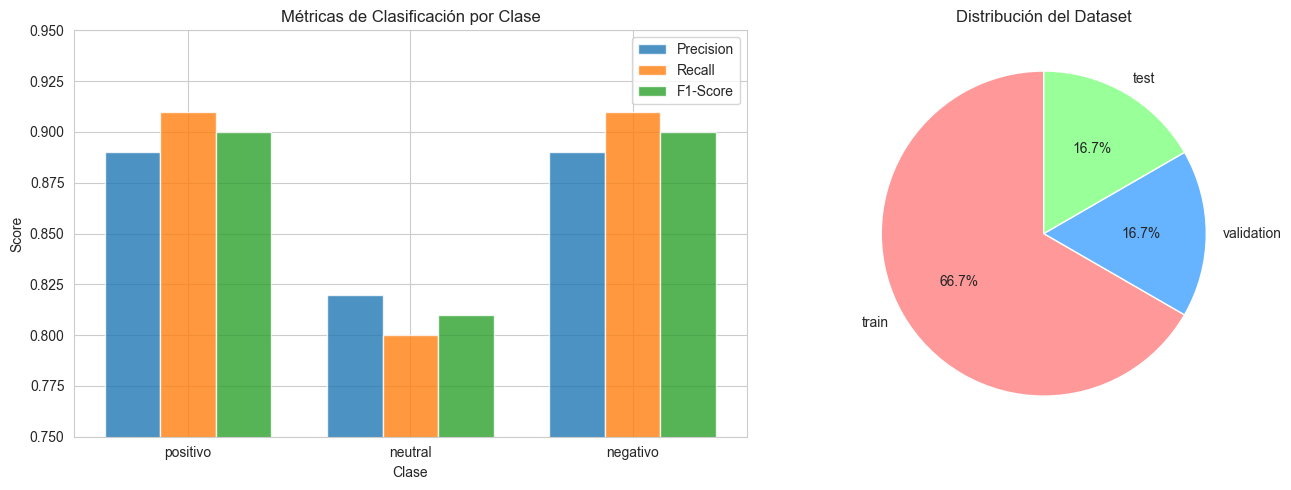

\La clase 'neutral' tiene menor desempeño - considerar más datos de entrenamiento


In [ ]:
# Convertir resultados JSON a DataFrame
print("\n CONVERSIÓN A DATAFRAME\n")

# Extraer métricas por clase
metricas_clase = []
for clase, metricas in datos['resultados']['por_clase'].items():
    metricas['clase'] = clase
    metricas_clase.append(metricas)

df_metricas = pd.DataFrame(metricas_clase)
df_metricas = df_metricas[['clase', 'precision', 'recall', 'f1', 'support']]

print("Métricas por clase:")
print(df_metricas.to_string(index=False))

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Métricas por clase
x = np.arange(len(df_metricas))
width = 0.25

axes[0].bar(x - width, df_metricas['precision'], width, label='Precision', alpha=0.8)
axes[0].bar(x, df_metricas['recall'], width, label='Recall', alpha=0.8)
axes[0].bar(x + width, df_metricas['f1'], width, label='F1-Score', alpha=0.8)
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Score')
axes[0].set_title('Métricas de Clasificación por Clase')
axes[0].set_xticks(x)
axes[0].set_xticklabels(df_metricas['clase'])
axes[0].legend()
axes[0].set_ylim([0.75, 0.95])

# Gráfico 2: Distribución de muestras
split_data = datos['dataset']['split']
axes[1].pie(split_data.values(), labels=split_data.keys(), autopct='%1.1f%%',
            startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
axes[1].set_title('Distribución del Dataset')

plt.tight_layout()
plt.show()

print("\n💡 La clase 'neutral' tiene menor desempeño - considerar más datos de entrenamiento")

In [ ]:
# JSON Lines (JSONL) - Formato para streaming de datos
print("📝 JSON LINES (JSONL) - Streaming de datos\n")

# Crear archivo JSONL con múltiples predicciones
predicciones = [
    {"id": 1, "texto": "Excelente producto, muy recomendable", "prediccion": "positivo", "confianza": 0.95},
    {"id": 2, "texto": "No me gustó para nada, mala calidad", "prediccion": "negativo", "confianza": 0.89},
    {"id": 3, "texto": "Es aceptable, nada especial", "prediccion": "neutral", "confianza": 0.78},
    {"id": 4, "texto": "Increíble experiencia, volveré", "prediccion": "positivo", "confianza": 0.93},
    {"id": 5, "texto": "Regular, esperaba más", "prediccion": "neutral", "confianza": 0.72}
]

# Guardar como JSONL (una línea por objeto)
with open('predicciones.jsonl', 'w', encoding='utf-8') as f:
    for pred in predicciones:
        f.write(json.dumps(pred, ensure_ascii=False) + '\n')

print("✓ Archivo JSONL creado: predicciones.jsonl\n")

# Leer JSONL línea por línea (eficiente para archivos grandes)
predicciones_cargadas = []
with open('predicciones.jsonl', 'r', encoding='utf-8') as f:
    for linea in f:
        predicciones_cargadas.append(json.loads(linea))

df_predicciones = pd.DataFrame(predicciones_cargadas)
print("Predicciones cargadas desde JSONL:")
print(df_predicciones.to_string(index=False))

print("\n💡 JSONL es ideal para:")
print("   • Logs de aplicaciones")
print("   • Streaming de datos de sensores IoT")
print("   • Datasets grandes que no caben en memoria")
print("   • Procesamiento paralelo (cada línea es independiente)")

JSON LINES (JSONL) - Streaming de datos
✓ Archivo JSONL creado: predicciones.jsonl


JSONDecodeError: Extra data: line 1 column 104 (char 103)

## 5. Compresión y Descompresión: TAR, GZIP y ZIP

La compresión es fundamental en ciencia de datos para:
- Reducir costos de almacenamiento en cloud (S3, GCS, Azure)
- Acelerar transferencias de datos
- Distribuir datasets y modelos entrenados
- Hacer backups eficientes

### Formatos principales:

**TAR** (Tape Archive):
- Empaqueta múltiples archivos en uno solo
- NO comprime (solo agrupa)
- Preserva permisos y estructura de directorios
- Común en Linux/Unix

**GZIP** (.gz):
- Comprime archivos individuales
- Algoritmo DEFLATE (LZ77 + Huffman)
- Streaming-friendly
- Muy común: .tar.gz = TAR + GZIP

**ZIP**:
- Empaqueta Y comprime
- Acceso aleatorio a archivos internos
- Estándar en Windows
- Compatible universalmente

In [ ]:
# Crear archivos de ejemplo para comprimir
Path("dataset_compresion").mkdir(exist_ok=True)

# Crear varios archivos CSV
for i in range(3):
    with open(f"dataset_compresion/data_{i}.csv", 'w') as f:
        f.write("id,feature1,feature2,feature3,label\\n")
        for j in range(1000):
            f.write(f"{j},{np.random.rand():.4f},{np.random.rand():.4f},"
                   f"{np.random.rand():.4f},{np.random.choice([0,1])}\\n")

# Crear archivo de texto (logs)
with open("dataset_compresion/logs.txt", 'w') as f:
    for i in range(5000):
        f.write(f"[2025-11-19 10:{i%60:02d}] INFO: Processing record {i}\\n")

print("✓ Archivos de ejemplo creados en dataset_compresion/")

# Calcular tamaño original
def get_dir_size(path):
    total = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            if os.path.exists(fp):
                total += os.path.getsize(fp)
    return total

tamano_original = get_dir_size("dataset_compresion")
print(f"\\nTamaño original del dataset: {tamano_original:,} bytes ({tamano_original/1024:.2f} KB)")

In [ ]:
# Comprimir con TAR (sin compresión)
print("TAR (empaquetado sin compresión)")
print("-" * 50)

with tarfile.open('dataset.tar', 'w') as tar:
    tar.add('dataset_compresion', arcname='dataset')

tamano_tar = os.path.getsize('dataset.tar')
print(f"Tamaño TAR: {tamano_tar:,} bytes ({tamano_tar/1024:.2f} KB)")
print(f"Ratio: {tamano_tar/tamano_original:.2%}")

# Comprimir con TAR + GZIP
print("TAR.GZ (empaquetado + compresión GZIP)")
print("-" * 50)

with tarfile.open('dataset.tar.gz', 'w:gz') as tar:
    tar.add('dataset_compresion', arcname='dataset')

tamano_targz = os.path.getsize('dataset.tar.gz')
print(f"Tamaño TAR.GZ: {tamano_targz:,} bytes ({tamano_targz/1024:.2f} KB)")
print(f"Compresión: {(1 - tamano_targz/tamano_original)*100:.1f}%")

# Comprimir con ZIP
print("ZIP (empaquetado + compresión)")
print("-" * 50)

with zipfile.ZipFile('dataset.zip', 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk('dataset_compresion'):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, 'dataset_compresion')
            zipf.write(file_path, arcname)

tamano_zip = os.path.getsize('dataset.zip')
print(f"Tamaño ZIP: {tamano_zip:,} bytes ({tamano_zip/1024:.2f} KB)")
print(f"Compresión: {(1 - tamano_zip/tamano_original)*100:.1f}%")

In [ ]:
# Visualización comparativa
formatos = ['Original', 'TAR', 'TAR.GZ', 'ZIP']
tamanos = [tamano_original, tamano_tar, tamano_targz, tamano_zip]
colores = ['gray', 'steelblue', 'green', 'coral']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Tamaños absolutos
axes[0].bar(formatos, [t/1024 for t in tamanos], color=colores, alpha=0.7)
axes[0].set_ylabel('Tamaño (KB)')
axes[0].set_title('Comparación de Tamaños de Archivo')
axes[0].grid(axis='y', alpha=0.3)

# Añadir valores
for i, (formato, tamano) in enumerate(zip(formatos, tamanos)):
    axes[0].text(i, tamano/1024 + 2, f'{tamano/1024:.1f} KB', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Gráfico 2: Ratios de compresión
ratios = [1.0, tamano_tar/tamano_original, 
          tamano_targz/tamano_original, tamano_zip/tamano_original]
compresion = [(1-r)*100 for r in ratios]

axes[1].bar(formatos, compresion, color=colores, alpha=0.7)
axes[1].set_ylabel('Reducción de tamaño (%)')
axes[1].set_title('Eficiencia de Compresión')
axes[1].grid(axis='y', alpha=0.3)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Añadir valores
for i, (formato, comp) in enumerate(zip(formatos, compresion)):
    axes[1].text(i, comp + 1, f'{comp:.1f}%', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("RESUMEN DE COMPRESIÓN:")
print(f"  • TAR: Sin compresión (solo empaquetado)")
print(f"  • TAR.GZ: {(1-tamano_targz/tamano_original)*100:.1f}% de reducción")
print(f"  • ZIP: {(1-tamano_zip/tamano_original)*100:.1f}% de reducción")
print(f"TAR.GZ suele ser mejor que ZIP para archivos de texto/CSV")

In [ ]:
# Descomprimir archivos
print("DESCOMPRESIÓN DE ARCHIVOS")

# Extraer TAR.GZ
print("1. Extrayendo TAR.GZ...")
with tarfile.open('dataset.tar.gz', 'r:gz') as tar:
    tar.extractall('extracted_targz')
print("   ✓ Extraído en: extracted_targz/")

# Listar contenido de ZIP sin extraer
print("\\n2. Listando contenido de ZIP (sin extraer):")
with zipfile.ZipFile('dataset.zip', 'r') as zipf:
    for info in zipf.infolist()[:5]:
        ratio = (1 - info.compress_size / info.file_size) * 100 if info.file_size > 0 else 0
        print(f"   • {info.filename:20s} {info.file_size:>8,} bytes → "
              f"{info.compress_size:>8,} bytes ({ratio:.1f}% compresión)")

# Extraer solo un archivo específico del ZIP
print("\\n3. Extrayendo solo 'data_0.csv' del ZIP...")
with zipfile.ZipFile('dataset.zip', 'r') as zipf:
    zipf.extract('data_0.csv', 'extracted_zip')
print("   ✓ Archivo específico extraído: extracted_zip/data_0.csv")

print("\\n💡 Ventaja de ZIP: Acceso aleatorio (extraer archivos individuales sin descomprimir todo)")

## 6. Análisis de Formatos Contenedores: Video e Imagen

Los formatos contenedores son cruciales en Computer Vision y procesamiento multimedia.

### Formatos de Imagen:

**JPEG** (.jpg, .jpeg):
- Compresión con pérdida
- Ideal para fotografías
- No soporta transparencia
- Ajustable calidad (Q=1-100)

**PNG** (.png):
- Compresión sin pérdida
- Soporta transparencia
- Ideal para gráficos, logos
- Mayor tamaño que JPEG

**TIFF** (.tif, .tiff):
- Sin compresión o con compresión sin pérdida
- Múltiples páginas
- Usado en medicina, GIS
- Archivos muy grandes

### Metadatos EXIF:
- Cámara y configuración
- GPS (geolocalización)
- Fecha y hora
- Orientación
- Útil para análisis forense, organización

In [ ]:
# Crear imágenes de ejemplo
print("CREANDO IMÁGENES DE EJEMPLO\\n")

# Crear directorio
Path("imagenes_ejemplo").mkdir(exist_ok=True)

# 1. Imagen PNG con transparencia (gradiente)
img_png = Image.new('RGBA', (300, 200), (255, 255, 255, 0))
pixels = img_png.load()
for x in range(300):
    for y in range(200):
        r = int(255 * x / 300)
        g = int(255 * y / 200)
        b = 128
        alpha = int(255 * (x + y) / 500)
        pixels[x, y] = (r, g, b, alpha)

img_png.save('imagenes_ejemplo/gradiente.png')
print("✓ PNG con transparencia: gradiente.png")

# 2. Imagen JPEG (misma imagen sin transparencia, varias calidades)
img_rgb = img_png.convert('RGB')

img_rgb.save('imagenes_ejemplo/gradiente_q95.jpg', quality=95)
img_rgb.save('imagenes_ejemplo/gradiente_q75.jpg', quality=75)
img_rgb.save('imagenes_ejemplo/gradiente_q25.jpg', quality=25)
print("✓ JPEG con diferentes calidades: q95, q75, q25")

print("Comparación de tamaños:")

In [ ]:
# Analizar imágenes
imagenes = [
    'imagenes_ejemplo/gradiente.png',
    'imagenes_ejemplo/gradiente_q95.jpg',
    'imagenes_ejemplo/gradiente_q75.jpg',
    'imagenes_ejemplo/gradiente_q25.jpg'
]

datos_imagenes = []
for img_path in imagenes:
    img = Image.open(img_path)
    datos = {
        'archivo': Path(img_path).name,
        'formato': img.format,
        'modo': img.mode,
        'dimensiones': f"{img.width}x{img.height}",
        'tamaño_kb': Path(img_path).stat().st_size / 1024
    }
    datos_imagenes.append(datos)
    print(f"  {datos['archivo']:25s} {datos['formato']:5s} {datos['modo']:5s} "
          f"{datos['dimensiones']:10s} {datos['tamaño_kb']:>8.2f} KB")

# DataFrame para visualización
df_imagenes = pd.DataFrame(datos_imagenes)

# Visualizar comparación de tamaños
plt.figure(figsize=(10, 5))
plt.bar(df_imagenes['archivo'], df_imagenes['tamaño_kb'], alpha=0.7, color='steelblue')
plt.ylabel('Tamaño (KB)')
plt.title('Comparación de Tamaños según Formato y Calidad')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\\n💡 Observaciones:")
print("  • PNG es más grande (sin pérdida, con transparencia)")
print("  • JPEG Q95: Alta calidad, ~20% del tamaño PNG")
print("  • JPEG Q25: Calidad baja, artefactos visibles, muy comprimido")

In [ ]:
# Simular análisis de metadatos de imagen
print("\\ANÁLISIS DE METADATOS DE IMAGEN (simulado)\\n")

# Crear metadatos simulados
metadatos_simulados = {
    "archivo": "foto_ejemplo.jpg",
    "propiedades_basicas": {
        "formato": "JPEG",
        "dimensiones": "4000x3000 (12 MP)",
        "modo_color": "RGB",
        "profundidad_bits": 24,
        "tamaño_archivo": "3.2 MB"
    },
    "exif": {
        "camara": {
            "marca": "Canon",
            "modelo": "EOS R5",
            "lente": "RF 24-105mm f/4L"
        },
        "configuracion": {
            "iso": 400,
            "apertura": "f/5.6",
            "velocidad_obturacion": "1/250",
            "distancia_focal": "85mm",
            "flash": "No"
        },
        "fecha_hora": "2025-11-19 14:23:45",
        "gps": {
            "latitud": 40.4168,
            "longitud": -3.7038,
            "altitud": "667m",
            "ubicacion_aproximada": "Madrid, España"
        }
    },
    "uso_en_ml": {
        "datasets": "ImageNet, COCO, OpenImages",
        "preprocesamiento": [
            "Redimensionar a tamaño uniforme (224x224, 512x512)",
            "Normalizar píxeles [0,1] o [-1,1]",
            "Data augmentation (flip, rotate, crop)",
            "Extraer metadatos GPS para geo-análisis"
        ]
    }
}

print("Metadatos EXIF típicos de una fotografía:\\n")
print(json.dumps(metadatos_simulados, indent=2, ensure_ascii=False)[:600] + "\\n...")

### Formatos Contenedores de Video

**Concepto clave**: CONTENEDOR ≠ CODEC

- **Contenedor**: Formato del archivo (MP4, MKV, AVI, MOV)
- **Codec**: Algoritmo de compresión (H.264, H.265, VP9, AV1)

Un archivo `video.mp4` puede contener:
- Video: codec H.264
- Audio: codec AAC
- Subtítulos: formato SRT
- Metadatos: duración, resolución, bitrate

### Codecs modernos:

- **H.264/AVC**: Más común, universalmente soportado
- **H.265/HEVC**: 50% mejor compresión, 4K/8K
- **VP9**: Open source (Google), YouTube
- **AV1**: Futuro, libre de patentes, Netflix

### Metadatos de video para análisis:
- Resolución (1920x1080, 3840x2160)
- Frame rate (24fps, 30fps, 60fps)
- Bitrate (calidad)
- Duración
- Codec usado
- Información de audio (canales, sample rate)

In [ ]:
# Simulación de análisis de video (sin OpenCV por dependencias)
print("ANÁLISIS DE VIDEO (Simulado)\\n")

# Metadatos típicos de un video
video_metadata = {
    "archivo": "video_ejemplo.mp4",
    "contenedor": "MP4",
    "video": {
        "codec": "H.264 (AVC)",
        "resolucion": "1920x1080 (Full HD)",
        "fps": 30,
        "bitrate": "5000 kbps",
        "aspect_ratio": "16:9",
        "duracion_segundos": 120,
        "num_frames": 3600
    },
    "audio": {
        "codec": "AAC",
        "canales": "Stereo (2)",
        "sample_rate": "48 kHz",
        "bitrate": "192 kbps"
    },
    "tamaño_archivo_mb": 78.5,
    "uso_en_ai": {
        "action_recognition": "Extraer frames cada N segundos",
        "object_detection": "Procesar frame por frame",
        "scene_detection": "Analizar cambios entre frames",
        "video_classification": "Clips de 2-10 segundos"
    }
}

print("Metadatos típicos de un archivo de video:\\n")
print(json.dumps(video_metadata, indent=2, ensure_ascii=False))

print("Aplicaciones en IA:")
print("  • Computer Vision: Object detection, tracking")
print("  • Action Recognition: Identificar actividades humanas")
print("  • Video Summarization: Generar resúmenes automáticos")
print("  • Anomaly Detection: Detectar comportamientos anómalos")
print("  • Content Moderation: Filtrar contenido inapropiado")

## 7. Comparación de Formatos para Representación del Conocimiento

Cada formato tiene ventajas y casos de uso específicos en Ciencia de Datos e IA.

In [ ]:
# Tabla comparativa de formatos
comparacion_data = {
    'Formato': ['XML', 'CSV', 'JSON', 'Parquet', 'HDF5'],
    'Tipo': ['Jerárquico', 'Tabular', 'Jerárquico', 'Columnar', 'Científico'],
    'Legibilidad': ['Media', 'Alta', 'Alta', 'Baja', 'Baja'],
    'Tamaño': ['Grande', 'Medio', 'Medio', 'Pequeño', 'Pequeño'],
    'Velocidad': ['Lenta', 'Media', 'Media', 'Rápida', 'Rápida'],
    'Tipos_Datos': ['No preserva', 'No preserva', 'Básicos', 'Preserva', 'Preserva'],
    'Anidación': ['Sí', 'No', 'Sí', 'Limitada', 'Sí']
}

df_comparacion = pd.DataFrame(comparacion_data)

print("COMPARACIÓN DE FORMATOS PARA CIENCIA DE DATOS")
print(df_comparacion.to_string(index=False))

# Visualización de características
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Legibilidad
legibilidad_scores = {'XML': 2, 'CSV': 3, 'JSON': 3, 'Parquet': 1, 'HDF5': 1}
axes[0, 0].barh(list(legibilidad_scores.keys()), list(legibilidad_scores.values()), 
                color='steelblue', alpha=0.7)
axes[0, 0].set_xlabel('Score (1=Baja, 3=Alta)')
axes[0, 0].set_title('Legibilidad Humana')
axes[0, 0].set_xlim([0, 3.5])

# 2. Tamaño de archivo (relativo)
tamaño_scores = {'XML': 3, 'CSV': 2, 'JSON': 2, 'Parquet': 1, 'HDF5': 1}
axes[0, 1].barh(list(tamaño_scores.keys()), list(tamaño_scores.values()), 
                color='coral', alpha=0.7)
axes[0, 1].set_xlabel('Score (1=Pequeño, 3=Grande)')
axes[0, 1].set_title('Tamaño de Archivo')
axes[0, 1].set_xlim([0, 3.5])

# 3. Velocidad de lectura
velocidad_scores = {'XML': 1, 'CSV': 2, 'JSON': 2, 'Parquet': 3, 'HDF5': 3}
axes[1, 0].barh(list(velocidad_scores.keys()), list(velocidad_scores.values()), 
                color='green', alpha=0.7)
axes[1, 0].set_xlabel('Score (1=Lenta, 3=Rápida)')
axes[1, 0].set_title('Velocidad de Lectura/Escritura')
axes[1, 0].set_xlim([0, 3.5])

# 4. Soporte de estructuras complejas
complejidad_scores = {'XML': 3, 'CSV': 1, 'JSON': 3, 'Parquet': 2, 'HDF5': 3}
axes[1, 1].barh(list(complejidad_scores.keys()), list(complejidad_scores.values()), 
                color='purple', alpha=0.7)
axes[1, 1].set_xlabel('Score (1=Simple, 3=Complejo)')
axes[1, 1].set_title('Soporte de Estructuras Anidadas')
axes[1, 1].set_xlim([0, 3.5])

plt.tight_layout()
plt.show()

In [ ]:
# Casos de uso recomendados
print("CUÁNDO USAR CADA FORMATO")

casos_uso = {
    "XML": {
        "usar": [
            "Configuración de sistemas complejos",
            "Ontologías y grafos de conocimiento",
            "Documentos con estructura jerárquica",
            "Interoperabilidad con sistemas legacy",
            "Cuando se necesita validación con schemas"
        ],
        "no_usar": [
            "Datasets tabulares grandes",
            "Cuando la velocidad es crítica",
            "APIs REST modernas (usar JSON)"
        ]
    },
    "CSV": {
        "usar": [
            "Datos tabulares simples",
            "Intercambio universal de datos",
            "Exports de bases de datos",
            "Datasets de ML pequeños/medianos",
            "Cuando se necesita edición manual"
        ],
        "no_usar": [
            "Datos jerárquicos o anidados",
            "Datasets muy grandes (>1GB)",
            "Cuando tipos de datos son críticos"
        ]
    },
    "JSON": {
        "usar": [
            "APIs REST / GraphQL",
            "Configuración de modelos ML",
            "Respuestas de servicios web",
            "Datos con estructura variable",
            "NoSQL databases (MongoDB)"
        ],
        "no_usar": [
            "Datasets tabulares grandes",
            "Cuando el tamaño es crítico",
            "Datos científicos con arrays N-D"
        ]
    },
    "Parquet": {
        "usar": [
            "Big Data (Spark, Hadoop)",
            "Data lakes y warehouses",
            "Analytics con queries columnares",
            "ML con datasets grandes",
            "AWS S3, Google BigQuery"
        ],
        "no_usar": [
            "Cuando se necesita edición manual",
            "Datasets muy pequeños (<1MB)",
            "Procesamiento row-by-row"
        ]
    },
    "HDF5": {
        "usar": [
            "Arrays multidimensionales grandes",
            "Datos científicos (astronomía, genómica)",
            "Deep Learning (weights, embeddings)",
            "Series temporales complejas",
            "Cuando se necesita acceso parcial"
        ],
        "no_usar": [
            "Datos tabulares simples",
            "Cuando portabilidad es crítica",
            "Proyectos web/móvil"
        ]
    }
}

for formato, info in casos_uso.items():
    print(f"\\n{'='*60}")
    print(f"{formato}")
    print('='*60)
    print("USAR CUANDO:")
    for caso in info['usar']:
        print(f"   • {caso}")
    print("NO USAR CUANDO:")
    for caso in info['no_usar']:
        print(f"   • {caso}")

## 8. Resumen y Mejores Prácticas

### 🎓 Conclusiones Clave:

1. **No hay un formato "mejor"** - depende del caso de uso
2. **Considerar el trade-off**: tamaño vs velocidad vs legibilidad
3. **Preservar metadatos** es crucial para reproducibilidad
4. **Comprimir datos** antes de almacenar/transferir en cloud
5. **Usar formatos eficientes** para datasets grandes (Parquet, HDF5)

### 💡 Mejores Prácticas:

**Para Proyectos de ML:**
- Datos raw: CSV/JSON (facilidad de inspección)
- Datos procesados: Parquet (eficiencia)
- Configuraciones: JSON o YAML
- Modelos guardados: Pickle + compresión GZIP
- Datasets grandes: HDF5 o TFRecord

**Para Análisis de Datos:**
- Exploración inicial: CSV con pandas
- Producción: Parquet + Spark/Dask
- Reportes: Excel o CSV
- APIs: JSON

**Para Computer Vision:**
- Training: JPEG (Q=90-95)
- Almacenamiento: Formato original + thumbnails WebP
- Procesamiento: Arrays NumPy → HDF5
- Metadatos: JSON separado

**Para Compartir:**
- Código + datos: TAR.GZ o ZIP
- Incluir: README.md, requirements.txt
- Documentar: formato, estructura, licencia
- Checksum: MD5/SHA256 para verificar integridad

In [ ]:
# Resumen visual final
print("RESUMEN EJECUTIVO\\n")

# Crear matriz de decisión
criterios = ['Simplicidad', 'Velocidad', 'Compresión', 'Anidación', 'Tipos_Datos']
formatos_eval = ['XML', 'CSV', 'JSON', 'Parquet', 'HDF5']

# Scores: 1-5 (1=peor, 5=mejor)
scores_matrix = np.array([
    [2, 1, 1, 5, 2],  # XML
    [5, 3, 2, 1, 1],  # CSV
    [4, 3, 2, 5, 2],  # JSON
    [2, 5, 5, 3, 5],  # Parquet
    [2, 5, 5, 5, 5]   # HDF5
])

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(scores_matrix, annot=True, fmt='d', cmap='RdYlGn', 
            xticklabels=criterios, yticklabels=formatos_eval,
            cbar_kws={'label': 'Score (1-5)'}, vmin=1, vmax=5)
plt.title('Matriz de Evaluación de Formatos\\n(1=Peor, 5=Mejor)', fontsize=14, fontweight='bold')
plt.xlabel('Criterios')
plt.ylabel('Formatos')
plt.tight_layout()
plt.show()

print("RECOMENDACIONES POR ESCENARIO:\\n")

escenarios = {
    "Dataset tabular pequeño (<100MB)": "CSV",
    "Dataset tabular grande (>1GB)": "Parquet",
    "API REST": "JSON",
    "Configuración de modelo": "JSON o YAML",
    "Imágenes para training": "JPEG Q=90 + JSON metadatos",
    "Arrays científicos": "HDF5",
    "Compartir proyecto completo": "TAR.GZ",
    "Ontología/Grafo de conocimiento": "XML o JSON-LD",
    "Streaming de eventos": "JSON Lines (JSONL)",
    "Modelo entrenado": "Pickle comprimido (.pkl.gz)"
}

for escenario, recomendacion in escenarios.items():
    print(f"  {escenario:40s} → {recomendacion}")

## Ejercicios prácticos

### Ejercicio 1: Conversión entre formatos
Convierte el archivo `modelos_nlp.csv` a:
- JSON (formato de lista de objetos)
- JSON Lines (una línea por modelo)
- Parquet (si tienes pyarrow instalado)

### Ejercicio 2: Análisis de compresión
Crea un dataset propio y compáralo con diferentes formatos:
- CSV sin comprimir
- CSV.GZ
- Parquet
- Calcula ratios de compresión

### Ejercicio 3: Pipeline completo
Simula un pipeline de ML:
1. Leer datos desde CSV
2. Procesar y transformar
3. Guardar configuración en JSON
4. Guardar resultados en formato eficiente
5. Comprimir todo para distribución

### Ejercicio 4: Metadatos de imagen
Si tienes fotos con EXIF:
- Extrae metadatos GPS
- Crea un mapa de ubicaciones
- Analiza patrones temporales

---

## Referencias y recursos

**Documentación oficial:**
- pandas: https://pandas.pydata.org/docs/
- JSON: https://www.json.org/
- Parquet: https://parquet.apache.org/
- HDF5: https://www.hdfgroup.org/

**Librerías útiles:**
```python
pip install pandas pyarrow fastparquet h5py pillow opencv-python
```

**Datasets para practicar:**
- Kaggle: https://www.kaggle.com/datasets
- UCI ML Repository: https://archive.ics.uci.edu/ml/
- Hugging Face: https://huggingface.co/datasets

---

## ¡Fin del Notebook!

Has aprendido sobre:
- ✓ XML para datos jerárquicos
- ✓ CSV para datos tabulares
- ✓ JSON para APIs y configuraciones
- ✓ Compresión (TAR, GZIP, ZIP)
- ✓ Formatos de imagen y video
- ✓ Cómo elegir el formato adecuado

**Próximos pasos:**
1. Practicar con tus propios datos
2. Explorar Parquet y HDF5 para Big Data
3. Implementar pipelines de procesamiento
4. Optimizar almacenamiento en proyectos reales